In [83]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Why NumPy?
1. For numeric operations NumPy is often more performant than equivalent code written in straght python.
2. NumPy array's memory layout is more compact than the python list.
3. NumPy array's memory layout matches well with the way libraries written in C work with data.

## Performance
Every thing in python is an object, even things like numbers. When you use a simple statement like:

    a = b + c
    
something complex is going on under the surface. b and c could be integers, floating point numbers, strings or even other types of objects. Python is looking at the types of b and c and deciding _+_ means in that context.

This is fine for most situations but when performing math operations on millions of numbers this type decoding can have a lot of overhead.

Since all elements of a NumPy array are the same type this decoding operation is unnecessary math operation don't incure this overhead.

In [84]:
from timeblock import timeblock

num_items = 1000
a = [0] * num_items
b = range(num_items)
c = range(num_items)

with timeblock("Add lists seconds"):
    for t in range(10000):
        for i in range(num_items):
            a[i] = b[i] + c[i]
        

Add lists seconds : 3.8168


In [85]:
from numpy import array, arange

b = arange(num_items)
c = arange(num_items)

with timeblock("Add arrays seconds"):
    for t in range(10000):
        a = b + c

Add arrays seconds : 0.0414


## NumPy arrays are more compact
![Memory](memory.png)

## Interfacing to other libraries
This compact layout corresponds to well to the way other libraries written in C or C++ store their array data. This make NumPy a good way to interface with these libraries.

## Example: OpenCV
OpenCV is a computer vision library written in C++ that has a python binding.

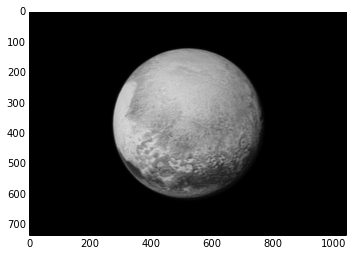

In [86]:
import cv2

image = cv2.imread("pluto.png")

plt.imshow(image) 

In [87]:
type(image)

numpy.ndarray

In [88]:
image.shape

(733, 1041, 3)

In [89]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [90]:
image[0,0,:]

array([0, 0, 0], dtype=uint8)

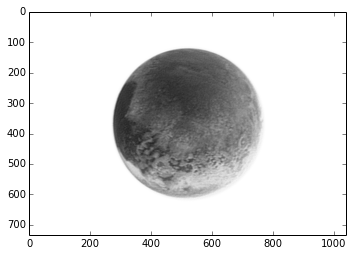

In [91]:
neg_image = 255 - image
plt.imshow(neg_image) 

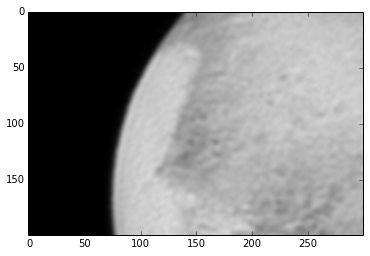

In [92]:
image3 = image[200:400,200:500,:]
plt.imshow(image3) 

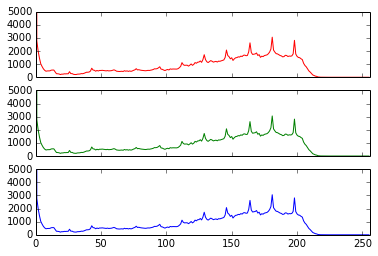

In [93]:
color = ['r', 'g', 'b']
fig, axes = plt.subplots(3, sharex=True)
for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0,256])
    axes[i].plot(histr, color = col)
    axes[i].set_xlim([0,256])
    axes[i].set_ylim([0,5000])

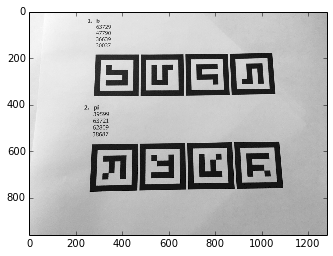

In [94]:
code_img = cv2.imread("IMG_0890.png", cv2.CV_LOAD_IMAGE_GRAYSCALE)
plt.imshow(code_img, cmap='gray') 

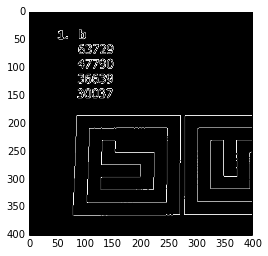

In [95]:
code_img2 = code_img[0:400,200:600]
edges = cv2.Canny(code_img2,100,200)
plt.imshow(edges, cmap='gray')

In [ ]:
edges.shape